Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading and Understanding Data


In [ ]:
df = pd.read_excel('/content/coffee_sales.csv (1).xlsx')

In [ ]:
df.head(10)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 53.2+ KB


In [ ]:
df.drop('card', axis = 1, inplace = True)
df.columns


Index(['date', 'datetime', 'cash_type', 'money', 'coffee_name', 'month', 'day',
       'hour'],
      dtype='object')

In [ ]:
df.size

6798

In [ ]:
df.shape

(1133, 6)

Data Cleaning

In [ ]:
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0


Drop Duplicates

In [ ]:
df.drop_duplicates()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [ ]:
df.describe()

,date,datetime,money
count,1133,1133,1133.000000
mean,2024-05-19 11:36:29.232127232,2024-05-20 02:38:39.053382912,33.105808
min,2024-03-01 00:00:00,2024-03-01 10:15:50.520000,18.120000
25%,2024-04-14 00:00:00,2024-04-14 10:55:27.406000128,28.900000
50%,2024-05-23 00:00:00,2024-05-23 12:22:06.604999936,32.820000
75%,2024-06-22 00:00:00,2024-06-22 08:39:50.272999936,37.720000
max,2024-07-31 00:00:00,2024-07-31 21:55:16.570000,40.000000
std,NaN,NaN,5.035366


Converting datetime to Month,Day,Date and Hour

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = pd.to_datetime(df['datetime']).dt.hour

df

,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,3,1,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,3,1,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,3,1,13
...,...,...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,7,31,20
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,7,31,20
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,7,31,21
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte,7,31,21


Exploratory Data Analysis





In [ ]:
cash_type_counts = df.groupby('cash_type').size().reset_index(name='count')
display(cash_type_counts)

,cash_type,count
0,card,1044


Text(0.5, 1.0, 'Payment Method Distribution (Barchart)')

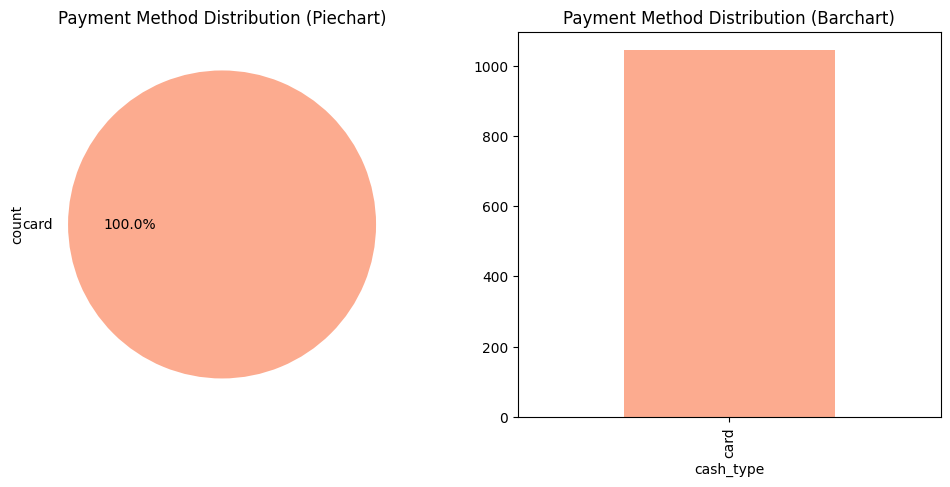

In [ ]:
color = plt.cm.Reds(np.linspace(0.3, 0.8, 2))

fig, ax = plt.subplots(1, 2, figsize = (12,5))
df['cash_type'].value_counts().plot.pie(autopct = "%1.1f%%", colors = color,
ax = ax[0])
ax[0].set_title('Payment Method Distribution (Piechart)')

df['cash_type'].value_counts().plot(kind = 'bar', color = color, ax = ax[1])
ax[1].set_title('Payment Method Distribution (Barchart)')

/tmp/ipython-input-788540576.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df['coffee_name'], order = df['coffee_name'].value_counts().
/tmp/ipython-input-788540576.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.countplot(y = df['coffee_name'], order = df['coffee_name'].value_counts().
/tmp/ipython-input-788540576.py:3: UserWarning: The palette list has more values (16) than needed (8), which may not be intended.
  sns.countplot(y = df['coffee_name'], order = df['coffee_name'].value_counts().


Text(0, 0.5, 'Coffee Type')

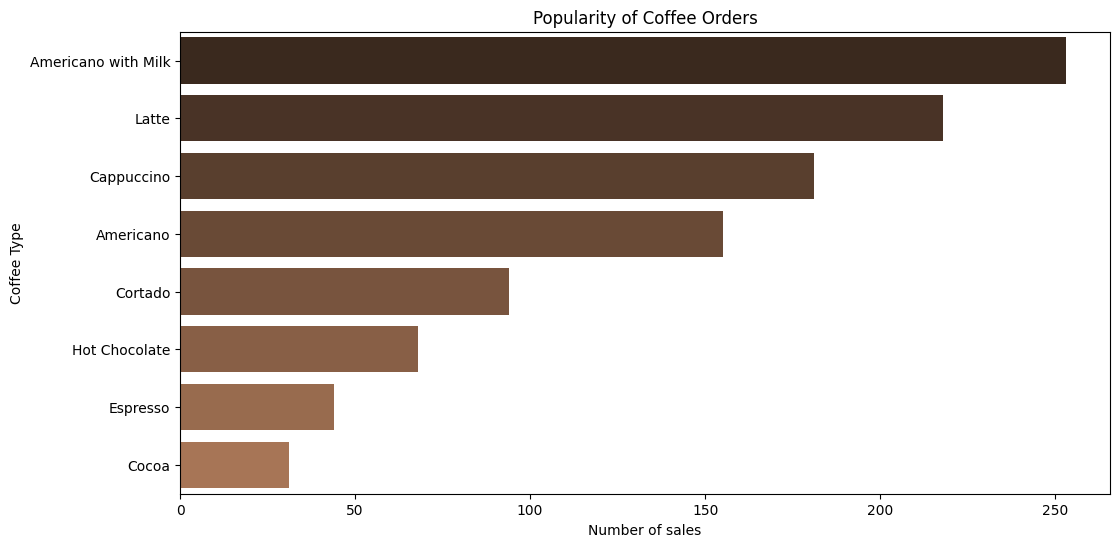

In [ ]:
browns = plt.cm.copper(np.linspace(0.2, 1, 16))
plt.figure(figsize = (12, 6))
sns.countplot(y = df['coffee_name'], order = df['coffee_name'].value_counts().
index, data = df, palette = browns)
plt.title('Popularity of Coffee Orders')
plt.xlabel('Number of sales')
plt.ylabel('Coffee Type')

/tmp/ipython-input-2208914163.py:2: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.histplot(df['money'], bins = 20, kde = True, palette = browns)
/tmp/ipython-input-2208914163.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['money'], bins = 20, kde = True, palette = browns)


Text(0.5, 1.0, 'Distribution of Money Spent')

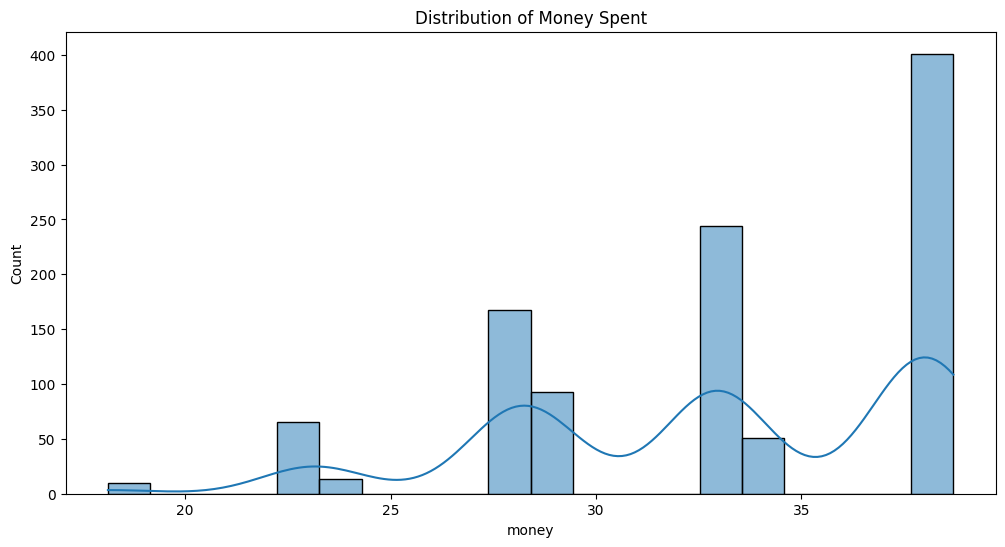

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(df['money'], bins = 20, kde = True, palette = browns)
plt.title('Distribution of Money Spent')

In [ ]:
df.head()


,date,datetime,cash_type,card,money,coffee_name,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,3,1,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,3,1,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,3,1,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,3,1,13


Text(0.5, 1.0, 'Sales per Coffee Type')

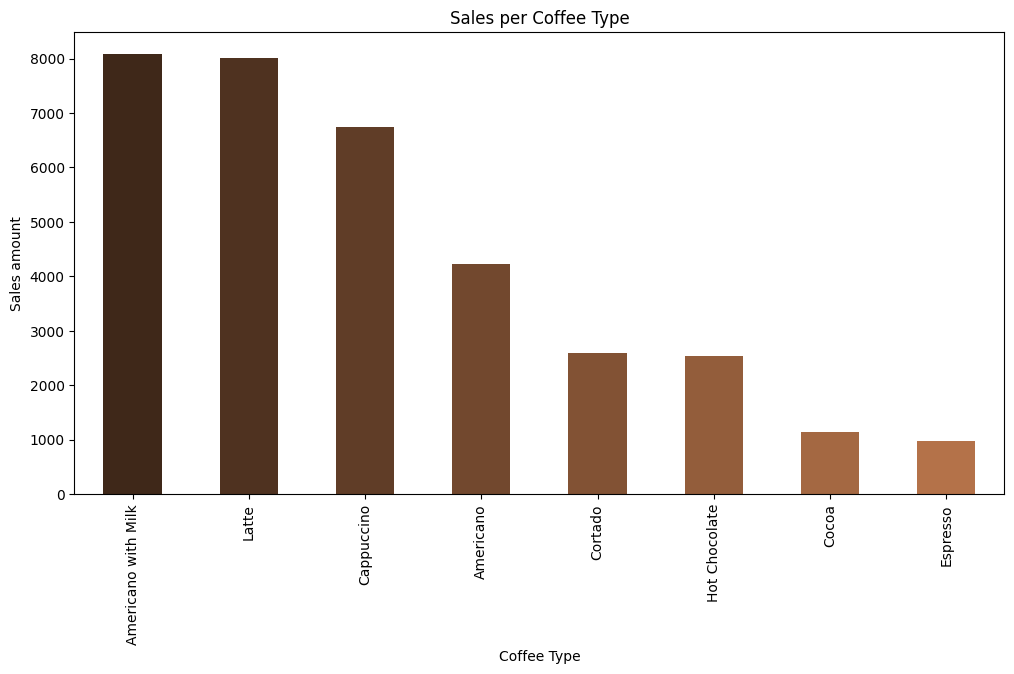

In [ ]:
coffee_group = df.groupby('coffee_name')['money'].sum()
coffee_group = coffee_group.sort_values(ascending = False)
coffee_group.plot(kind = "bar", figsize = (12, 6), color = browns)
plt.xlabel('Coffee Type')
plt.ylabel('Sales amount')
plt.title('Sales per Coffee Type')

/tmp/ipython-input-1958002117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['month'], palette = browns)
/tmp/ipython-input-1958002117.py:2: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.countplot(x = df['month'], palette = browns)
/tmp/ipython-input-1958002117.py:2: UserWarning: The palette list has more values (16) than needed (5), which may not be intended.
  sns.countplot(x = df['month'], palette = browns)


Text(0, 0.5, 'Number of Transactions')

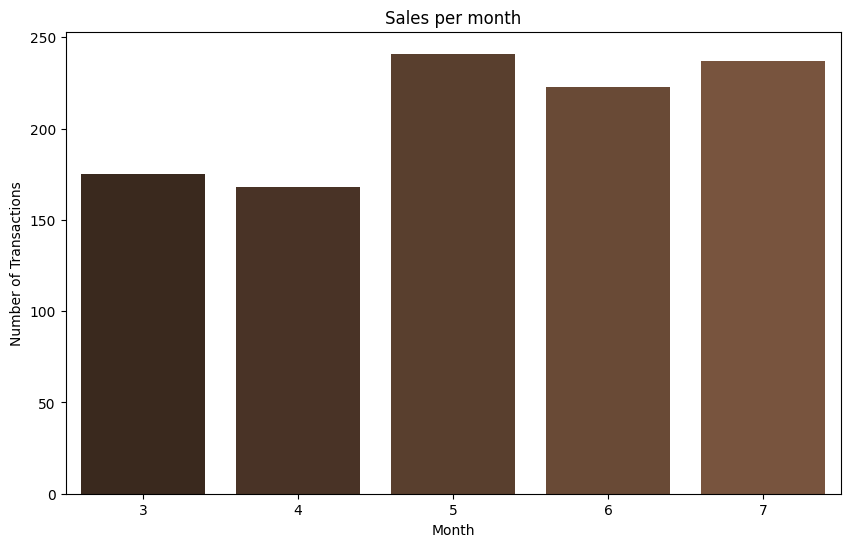

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['month'], palette = browns)
plt.title('Sales per month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')

Text(0, 0.5, 'Total Sales Amount')

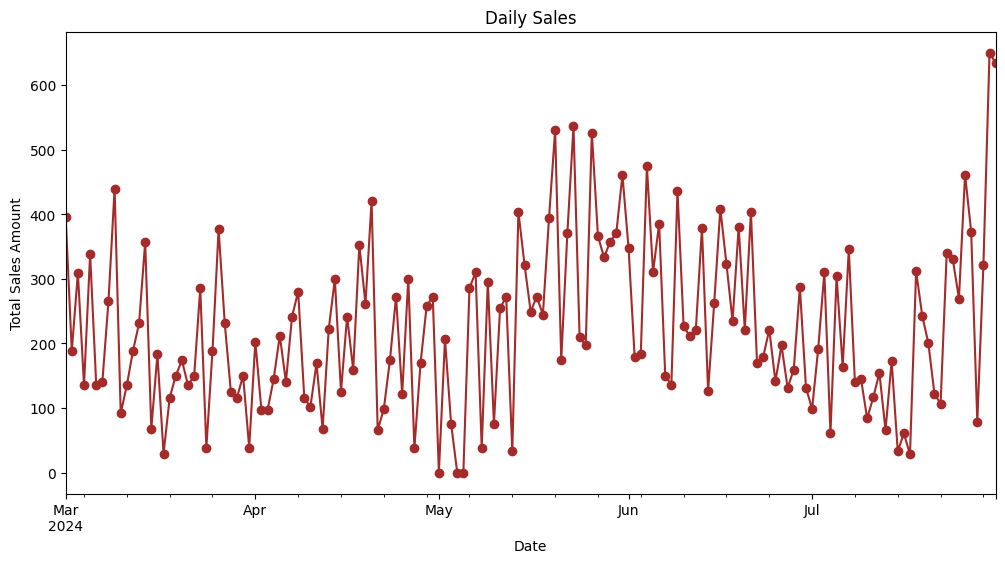

In [ ]:
plt.figure(figsize = (12, 6))
df.set_index('datetime')['money'].resample('D').sum().plot(kind = "line",
marker = "o", color = 'brown')
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')

Text(0, 0.5, 'Sales amount')

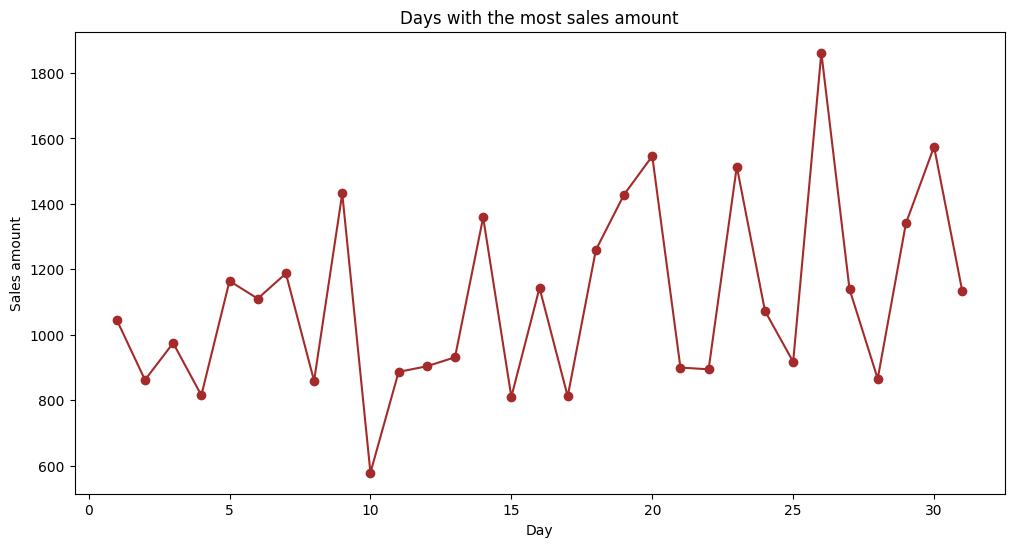

In [ ]:
plt.figure(figsize = (12, 6))
df.groupby('day')['money'].sum().plot(kind = "line", color = "brown",
marker = 'o')
plt.title('Days with the most sales amount')
plt.xlabel('Day')
plt.ylabel('Sales amount')

Text(0, 0.5, 'Number of Sales')

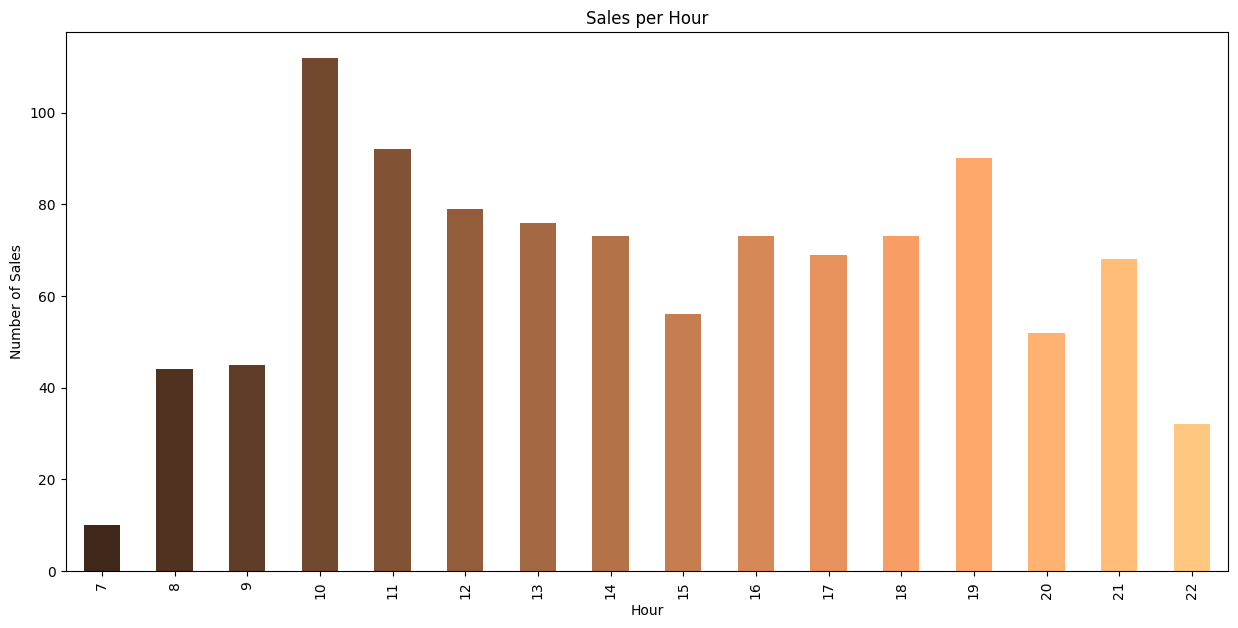

In [ ]:
df.groupby('hour').size().plot(kind = "bar", figsize = (15,7), color = browns)
plt.title('Sales per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Sales')